# Salt Lake City Historical Real Estate Data

## Exploring the Zillow Research Data Sets and Extracting SLC Relevant Data

In [473]:
import warnings
warnings.filterwarnings('ignore')

In [474]:
import os.path
import pandas as pd
import urllib.parse
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
import numpy as np

In [475]:
# import csv for downloaded from Zillow Research 'Home Values'

zr_data_set_loc = '/Users/jeff/Desktop/K2_DataScience/K2_Project2/Zillow_Analysis_Salt_Lake_City/zillow_research_home_values'
one_br_df = pd.read_csv(os.path.join(zr_data_set_loc, 'Zip_Zhvi_1bedroom.csv'))
two_br_df = pd.read_csv(os.path.join(zr_data_set_loc, 'Zip_Zhvi_2bedroom.csv'))
three_br_df = pd.read_csv(os.path.join(zr_data_set_loc, 'Zip_Zhvi_3bedroom.csv'))
four_br_df = pd.read_csv(os.path.join(zr_data_set_loc, 'Zip_Zhvi_4bedroom.csv'))
five_or_more_br_df = pd.read_csv(os.path.join(zr_data_set_loc, 'Zip_Zhvi_5BedroomOrMore.csv'))

In [476]:
# adding a column for bedroom number; 5 or more will be categorized as 5
one_br_df['beds'] = 1
two_br_df['beds'] = 2
three_br_df['beds'] = 3
four_br_df['beds'] = 4
five_or_more_br_df['beds'] = 5

In [477]:
# concatenate all bedrooms listing into one data frame
listings_historical = pd.concat([one_br_df, two_br_df, three_br_df, four_br_df, five_or_more_br_df])

# pull out only Utah listings
listings_historical_UT = listings_historical[listings_historical['State'] == 'UT']

# pull out only listings relevant to our zip codes of interest

slc_zip_list = [84101, 84102, 84103, 84104, 84105, 84106, 84107, 84108, 84109, 84111, 84114, 
                84115, 84054, 84119, 84116, 84117, 84118, 84120, 84121, 84123, 84124, 84128, 
                84129, 84010, 84087]

listings_historical_slc = listings_historical_UT[listings_historical_UT['RegionName'].isin(slc_zip_list)]

In [478]:
# import zip_to_neighborhood
zip_to_neighborhood = pd.read_csv('/Users/jeff/Desktop/K2_DataScience/K2_Project2/Zillow_Analysis_Salt_Lake_City/zillow_analysis_notebooks/zip_codes_to_neighborhood.csv', 
                           sep=',')

# zip code name name to RegionName to make joining easy

zip_to_neighborhood.columns = ['RegionName', 'neighborhood']

# join neighborhood classifications to the existing data frame

listings_historical_slc = pd.merge(listings_historical_slc, zip_to_neighborhood, on='RegionName', how='outer')

In [479]:
listings_historical_slc.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,beds,neighborhood
0,94477.0,84117,Holladay,UT,Salt Lake City,Salt Lake,1385.0,NaN,NaN,NaN,...,113400.0,114600.0,114700.0,114500.0,116800.0,122600.0,128300.0,130500.0,1.0,Millcreek_Holladay
1,94477.0,84117,Holladay,UT,Salt Lake City,Salt Lake,3893.0,156600.0,157300.0,157500.0,...,312600.0,313100.0,314300.0,315600.0,316300.0,317700.0,321100.0,324500.0,3.0,Millcreek_Holladay
2,94477.0,84117,Holladay,UT,Salt Lake City,Salt Lake,3813.0,183400.0,185600.0,187800.0,...,403000.0,405600.0,407500.0,406500.0,408800.0,416000.0,423300.0,425600.0,4.0,Millcreek_Holladay
3,94477.0,84117,Holladay,UT,Salt Lake City,Salt Lake,2889.0,228100.0,228500.0,228400.0,...,485900.0,488800.0,491100.0,492800.0,498500.0,507600.0,515100.0,518100.0,5.0,Millcreek_Holladay
4,94466.0,84106,Salt Lake City,UT,Salt Lake City,Salt Lake,823.0,96000.0,95800.0,95000.0,...,206100.0,207500.0,208800.0,210100.0,211000.0,210400.0,211300.0,214600.0,1.0,South SLC


In [480]:
# rename RegionName with postal_code to match the current listings data set
listings_historical_slc["postal_code"] = listings_historical_slc['RegionName']

# create a trimmed df of only time series data + the city_zip field as an index

listings_historical_slc = listings_historical_slc.drop(['RegionID','RegionName','City',
                                          'State','Metro','CountyName','SizeRank'], axis = 1)
# index the time series df to city_zip

listings_historical_slc.reset_index(drop=True, inplace=True)

In [481]:
# setting up melt categories
ids = ['beds',
'neighborhood',
'postal_code']

values = list(listings_historical_slc.columns)[:-3]

In [482]:
# 'melt' the data frame to create a long format; better for plotting time series

listings_historical_slc_long = pd.melt(listings_historical_slc, id_vars=ids, value_vars=values)

# rename the headers

listings_historical_slc_long.columns = ['beds', 'neighborhood', 'postal_code', 'year_month', 'price']

# convert the date column from a strind to a date time object

listings_historical_slc_long['year_month'] = pd.to_datetime(listings_historical_slc_long['year_month'], format='%Y-%m', errors='coerce').dropna()


## Exporting the Cleaned, Processed Active Listing Data

Here I exported the data frame to a csv so the fully processed data could be imported to the project overview notebook for summary visualizations.

In [483]:
listings_historical_slc_long.to_csv('zillow_slc_historic_prices_processed.csv')

In [484]:
listings_historical_slc_long.head()

,beds,neighborhood,postal_code,year_month,price
0,1.0,Millcreek_Holladay,84117,1996-04-01,NaN
1,3.0,Millcreek_Holladay,84117,1996-04-01,156600.0
2,4.0,Millcreek_Holladay,84117,1996-04-01,183400.0
3,5.0,Millcreek_Holladay,84117,1996-04-01,228100.0
4,1.0,South SLC,84106,1996-04-01,96000.0


### Plotting the Data

Now that the data is formatted, we can plot some data for 1, 2, and 3, bedrooms. We'll focus on plotting Downtown SLC, Millcreek_Holladay, and West Valley.

In [485]:
# make dict of all combinations of zip code/bedrooms
zipcode_list = list(listings_historical_slc_long['postal_code'].unique())
bed_list = list(range(1,6))
zipcode_bed_perms = {k:v for k,v in zip(zipcode_list, [bed_list]*len(zipcode_list))}

# make dict of all combinations of neighborhood/bedrooms
neighborhood_list = list(listings_historical_slc_long['neighborhood'].unique())
bed_list = list(range(1,6))
neighborhood_bed_perms = {k:v for k,v in zip(neighborhood_list, [bed_list]*len(neighborhood_list))}

In [486]:
# for each location/bed of home normalize to price at starting time stamp and save to dictionary

listings_historical_slc_long_adjusted = pd.DataFrame()

for zc,bds in zipcode_bed_perms.items():
    zipcode = zc
    for num in bds:
        beds = num
        zipcode_beds = listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == int(zipcode))
                                                                       &(listings_historical_slc_long['beds'] == beds)
                                                   ].dropna(axis=0, how='any')
        if len(zipcode_beds) > 0:
            min_year = min(zipcode_beds['year_month'])
            start_price = int((zipcode_beds['price'][zipcode_beds['year_month'] == min_year]).values)
            zipcode_beds['price_normalized'] = (zipcode_beds['price']) / start_price
            zipcode_beds['price_normalized_date'] = min_year
            listings_historical_slc_long_adjusted = listings_historical_slc_long_adjusted.append(zipcode_beds)
        else:
            pass

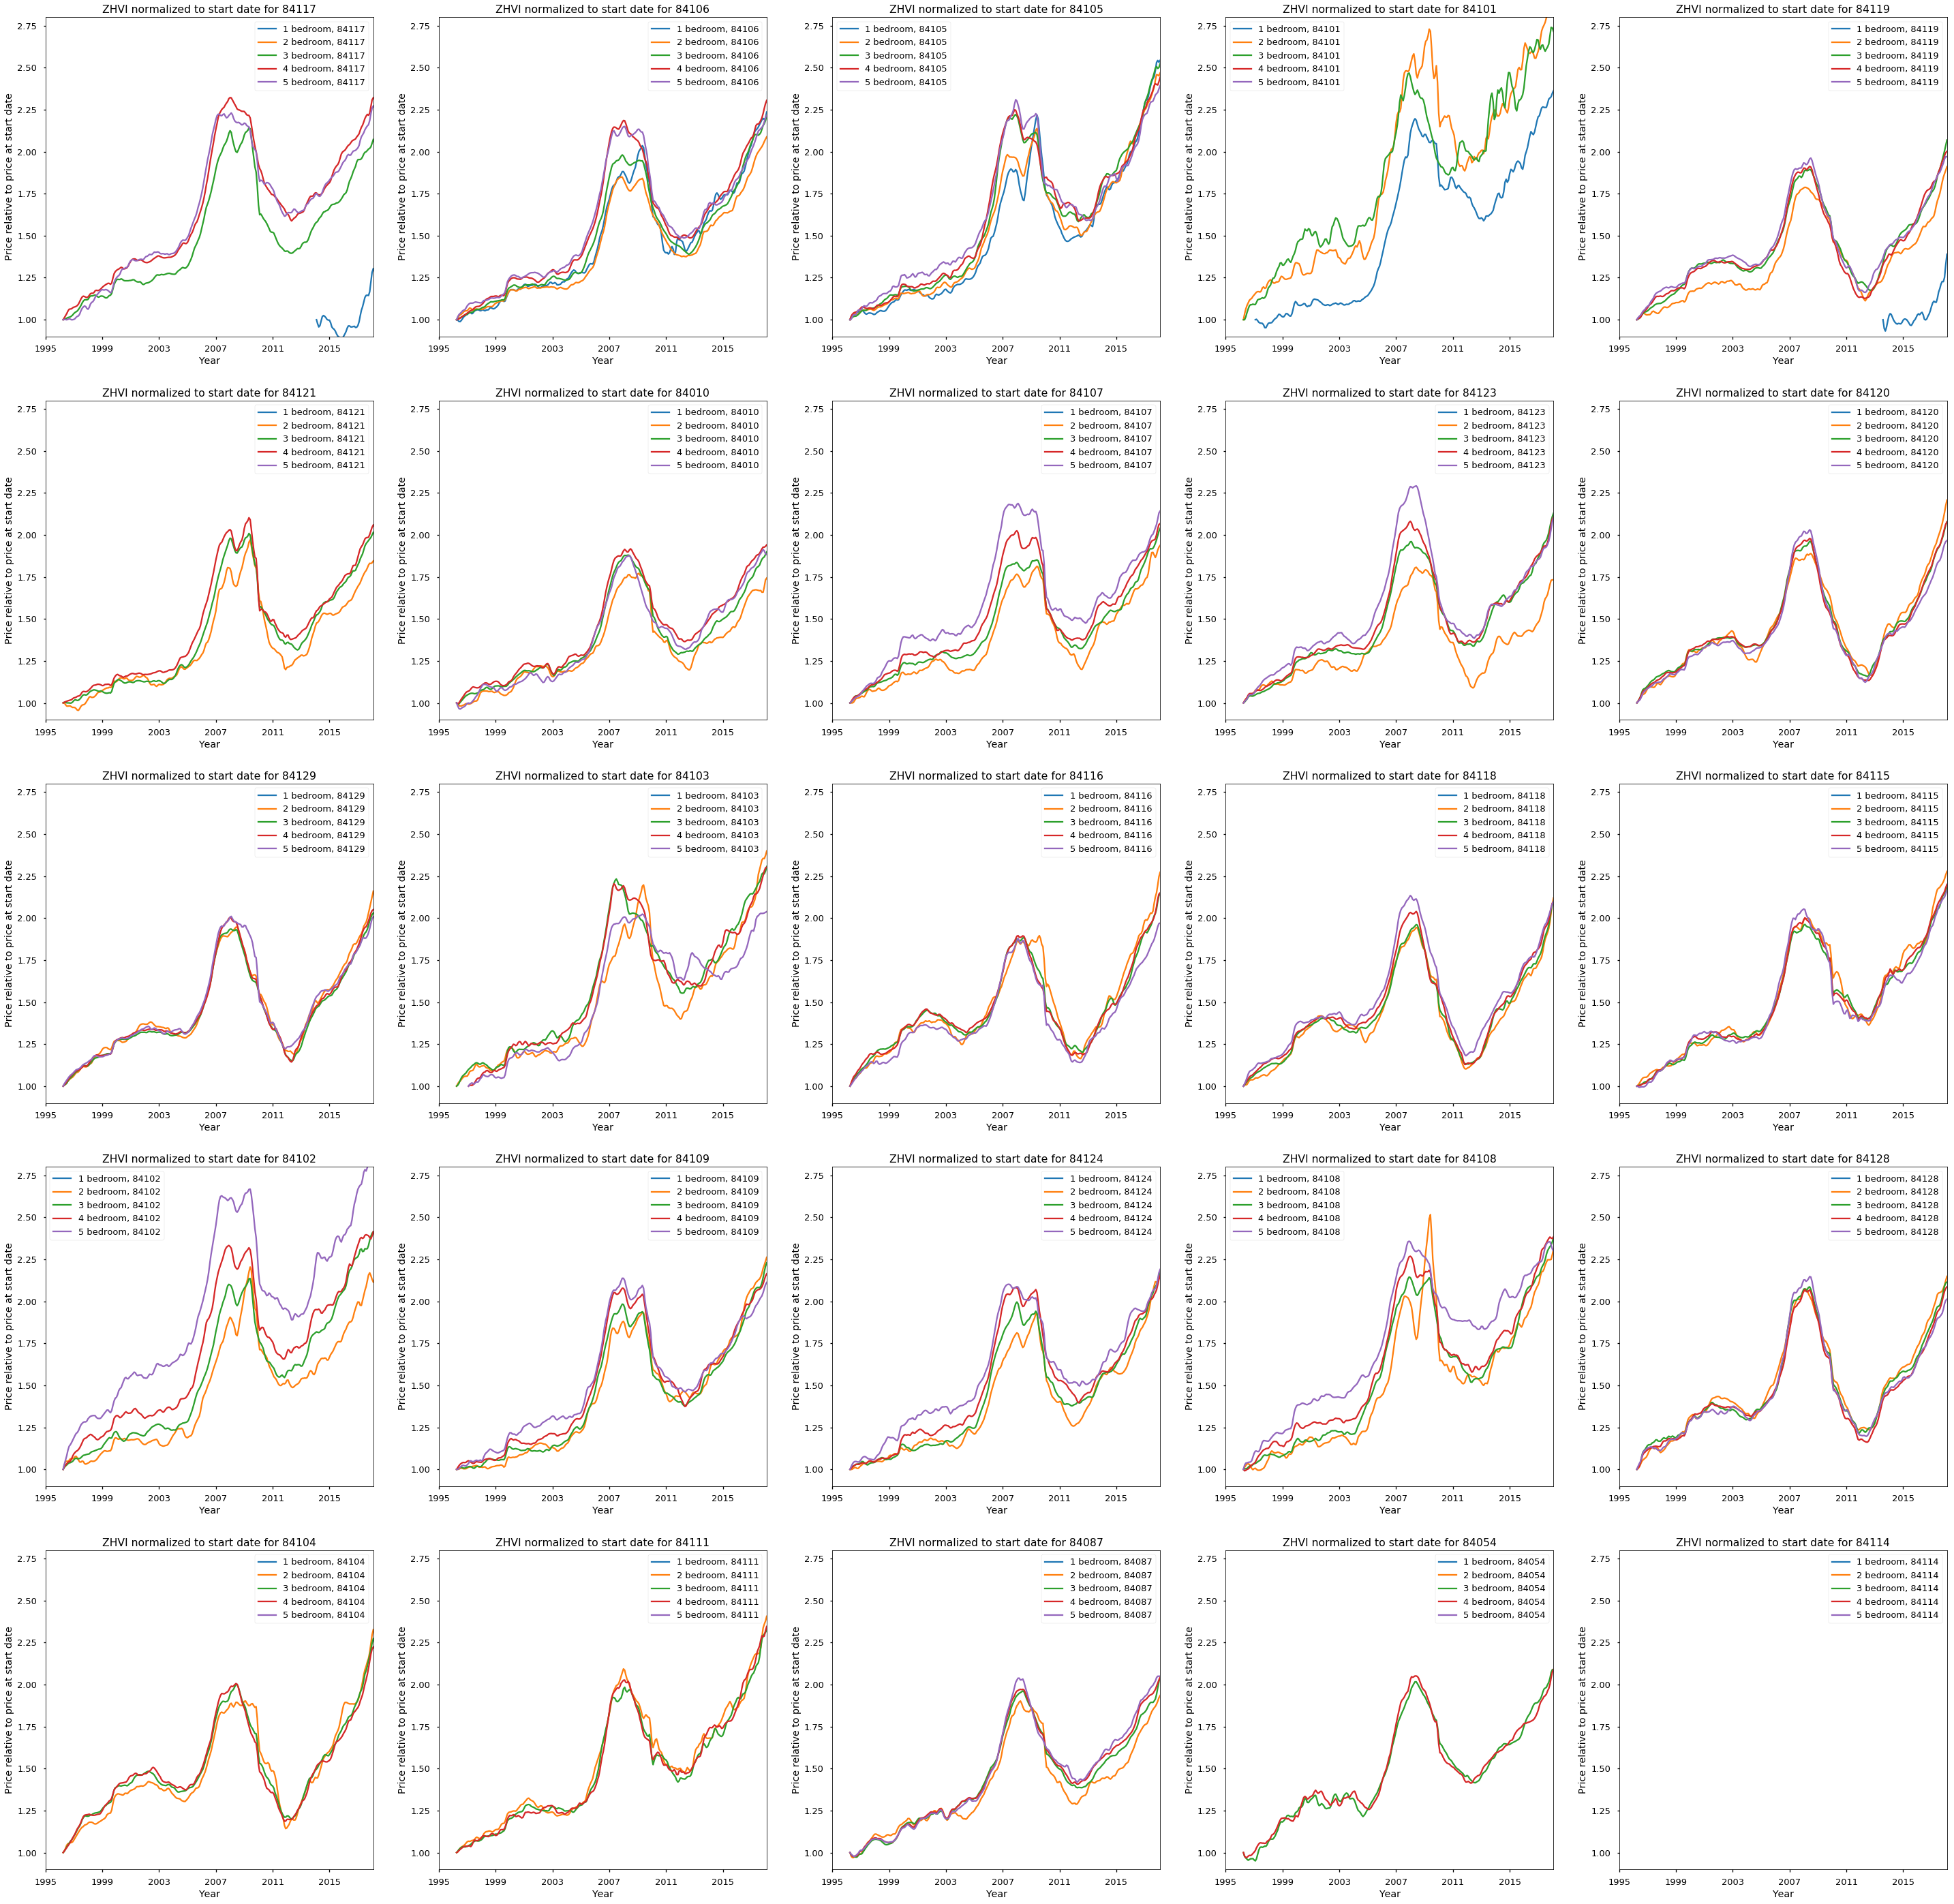

In [487]:
import datetime

# for each location/bed of home normalize to price at starting time stamp and save to dictionary

# make dict of all combinations of zip code/bedrooms with ONLY 84101, 84105, and 84106
#zipcode_list = ['84101', '84105', '84106']
zipcode_list = list(listings_historical_slc_long['postal_code'].unique())
bed_list = list(range(1,6))
zipcode_bed_perms = {k:v for k,v in zip(zipcode_list, [bed_list]*len(zipcode_list))}

#make the axes fonts bigger
sns.set_context("talk")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for zc,bds in zipcode_bed_perms.items():
    zipcode = zc
    zipcode_all_beds = listings_historical_slc_long_adjusted[(listings_historical_slc_long['postal_code'] == 
                                                             int(zipcode))].dropna(axis=0, how='any')
    fig.add_subplot(5, 5, sub_plot_num)
    for num in bds:
        beds = num
        #neib = zipcode_all_beds[zipcode_all_beds['postal_code']==zipcode]['neighborhood']
        zipcode_num_beds = zipcode_all_beds[zipcode_all_beds['beds']==num]
        plt.plot(zipcode_num_beds['year_month'], zipcode_num_beds['price_normalized'], label='{} bedroom, {}'.format(num, zc))
        plt.title('ZHVI normalized to start date for {}'.format(zipcode))
        plt.ylabel('Price relative to price at start date')
        plt.xlabel('Year')
        plt.ylim((0.9, 2.8))
        plt.xlim(datetime.date(1995, 1, 1), datetime.date(2018, 2, 1)) 
        plt.legend()
    sub_plot_num +=1

In [488]:
listings_historical_slc_long_adjusted[listings_historical_slc_long_adjusted['year_month']
                                      =='2018-02-01'].sort_values('price_normalized', ascending=False).head(n=10)

,beds,neighborhood,postal_code,year_month,price,price_normalized,price_normalized_date
24643,2.0,Downtown SLC,84101,2018-02-01,336300.0,2.894148,1996-04-01
24692,5.0,Downtown SLC,84102,2018-02-01,481900.0,2.821429,1996-04-01
24644,3.0,Downtown SLC,84101,2018-02-01,315800.0,2.715391,1996-04-01
24637,1.0,Downtown SLC,84105,2018-02-01,293500.0,2.543328,1996-04-01
24639,3.0,Downtown SLC,84105,2018-02-01,376700.0,2.523108,1996-04-01
24638,2.0,Downtown SLC,84105,2018-02-01,319400.0,2.468315,1996-04-01
24640,4.0,Downtown SLC,84105,2018-02-01,424400.0,2.441887,1996-04-01
24691,4.0,Downtown SLC,84102,2018-02-01,371300.0,2.414174,1996-04-01
24690,3.0,Downtown SLC,84102,2018-02-01,333000.0,2.413043,1996-04-01
24712,2.0,Downtown SLC,84111,2018-02-01,220600.0,2.405671,1996-04-01


In [489]:
listings_historical_neighborhood_beds = pd.DataFrame(listings_historical_slc_long_adjusted.groupby(['neighborhood','beds'])['price_normalized'].mean())

listings_historical_neighborhood_beds.columns = ['price_normalized']
listings_historical_neighborhood_beds.sort_values('price_normalized', ascending=False)

price_normalized
neighborhood         beds                  
Emigration Canyon    5.0           1.748604
Downtown SLC         5.0           1.709260
                     3.0           1.628905
Emigration Canyon    4.0           1.622084
Downtown SLC         4.0           1.607730
Murray               5.0           1.593192
Downtown SLC         2.0           1.588659
Millcreek_Holladay   5.0           1.579056
Emigration Canyon    3.0           1.565030
Millcreek_Holladay   4.0           1.552731
South SLC            4.0           1.533999
Downtown SLC         1.0           1.533749
South SLC            5.0           1.531220
Emigration Canyon    2.0           1.518055
Taylorsville_Midvale 5.0           1.509032
Murray               4.0           1.499317
South SLC            3.0           1.494544
                     1.0           1.474687
                     2.0           1.474536
Taylorsville_Midvale 4.0           1.472642
Millcreek_Holladay   3.0           1.466032
Cottonwood           4.0           1.463357
North SLC            4.0           1.460899
West Valley          3.0           1.457288
                     4.0           1.456180
Taylorsville_Midvale 3.0           1.452864
West Valley          5.0           1.448695
                     2.0           1.441856
Murray               3.0           1.440694
North SLC            3.0           1.436983
                     5.0           1.426613
Millcreek_Holladay   2.0           1.420629
Cottonwood           3.0           1.414767
Taylorsville_Midvale 2.0           1.396369
Murray               2.0           1.379815
North SLC            2.0           1.363681
Cottonwood           2.0           1.351221
West Valley          1.0           1.047489
Millcreek_Holladay   1.0           1.004873

In [490]:
# collapse neighborhoods with multiple zip codes to reflect average value of neighborhood across all zip codes
listings_historical_neibs = pd.DataFrame(listings_historical_slc_long_adjusted.groupby(['year_month','neighborhood', 'beds']).mean())

listings_historical_neibs_collapsed = listings_historical_neibs.reset_index()

In [491]:
listings_historical_neibs_collapsed.head()

,year_month,neighborhood,beds,postal_code,price,price_normalized
0,1996-04-01,Cottonwood,2.0,84121.0,130100.0,1.0
1,1996-04-01,Cottonwood,3.0,84121.0,157600.0,1.0
2,1996-04-01,Cottonwood,4.0,84121.0,172800.0,1.0
3,1996-04-01,Downtown SLC,1.0,84105.0,115400.0,1.0
4,1996-04-01,Downtown SLC,2.0,84104.4,115700.0,1.0


In [502]:
neighborhood_bed_perms

{'Cottonwood': [1, 2, 3, 4, 5],
 'Downtown SLC': [1, 2, 3, 4, 5],
 'Emigration Canyon': [1, 2, 3, 4, 5],
 'Millcreek_Holladay': [1, 2, 3, 4, 5],
 'Murray': [1, 2, 3, 4, 5],
 'North SLC': [1, 2, 3, 4, 5],
 'South SLC': [1, 2, 3, 4, 5],
 'Taylorsville_Midvale': [1, 2, 3, 4, 5],
 'West Valley': [1, 2, 3, 4, 5]}

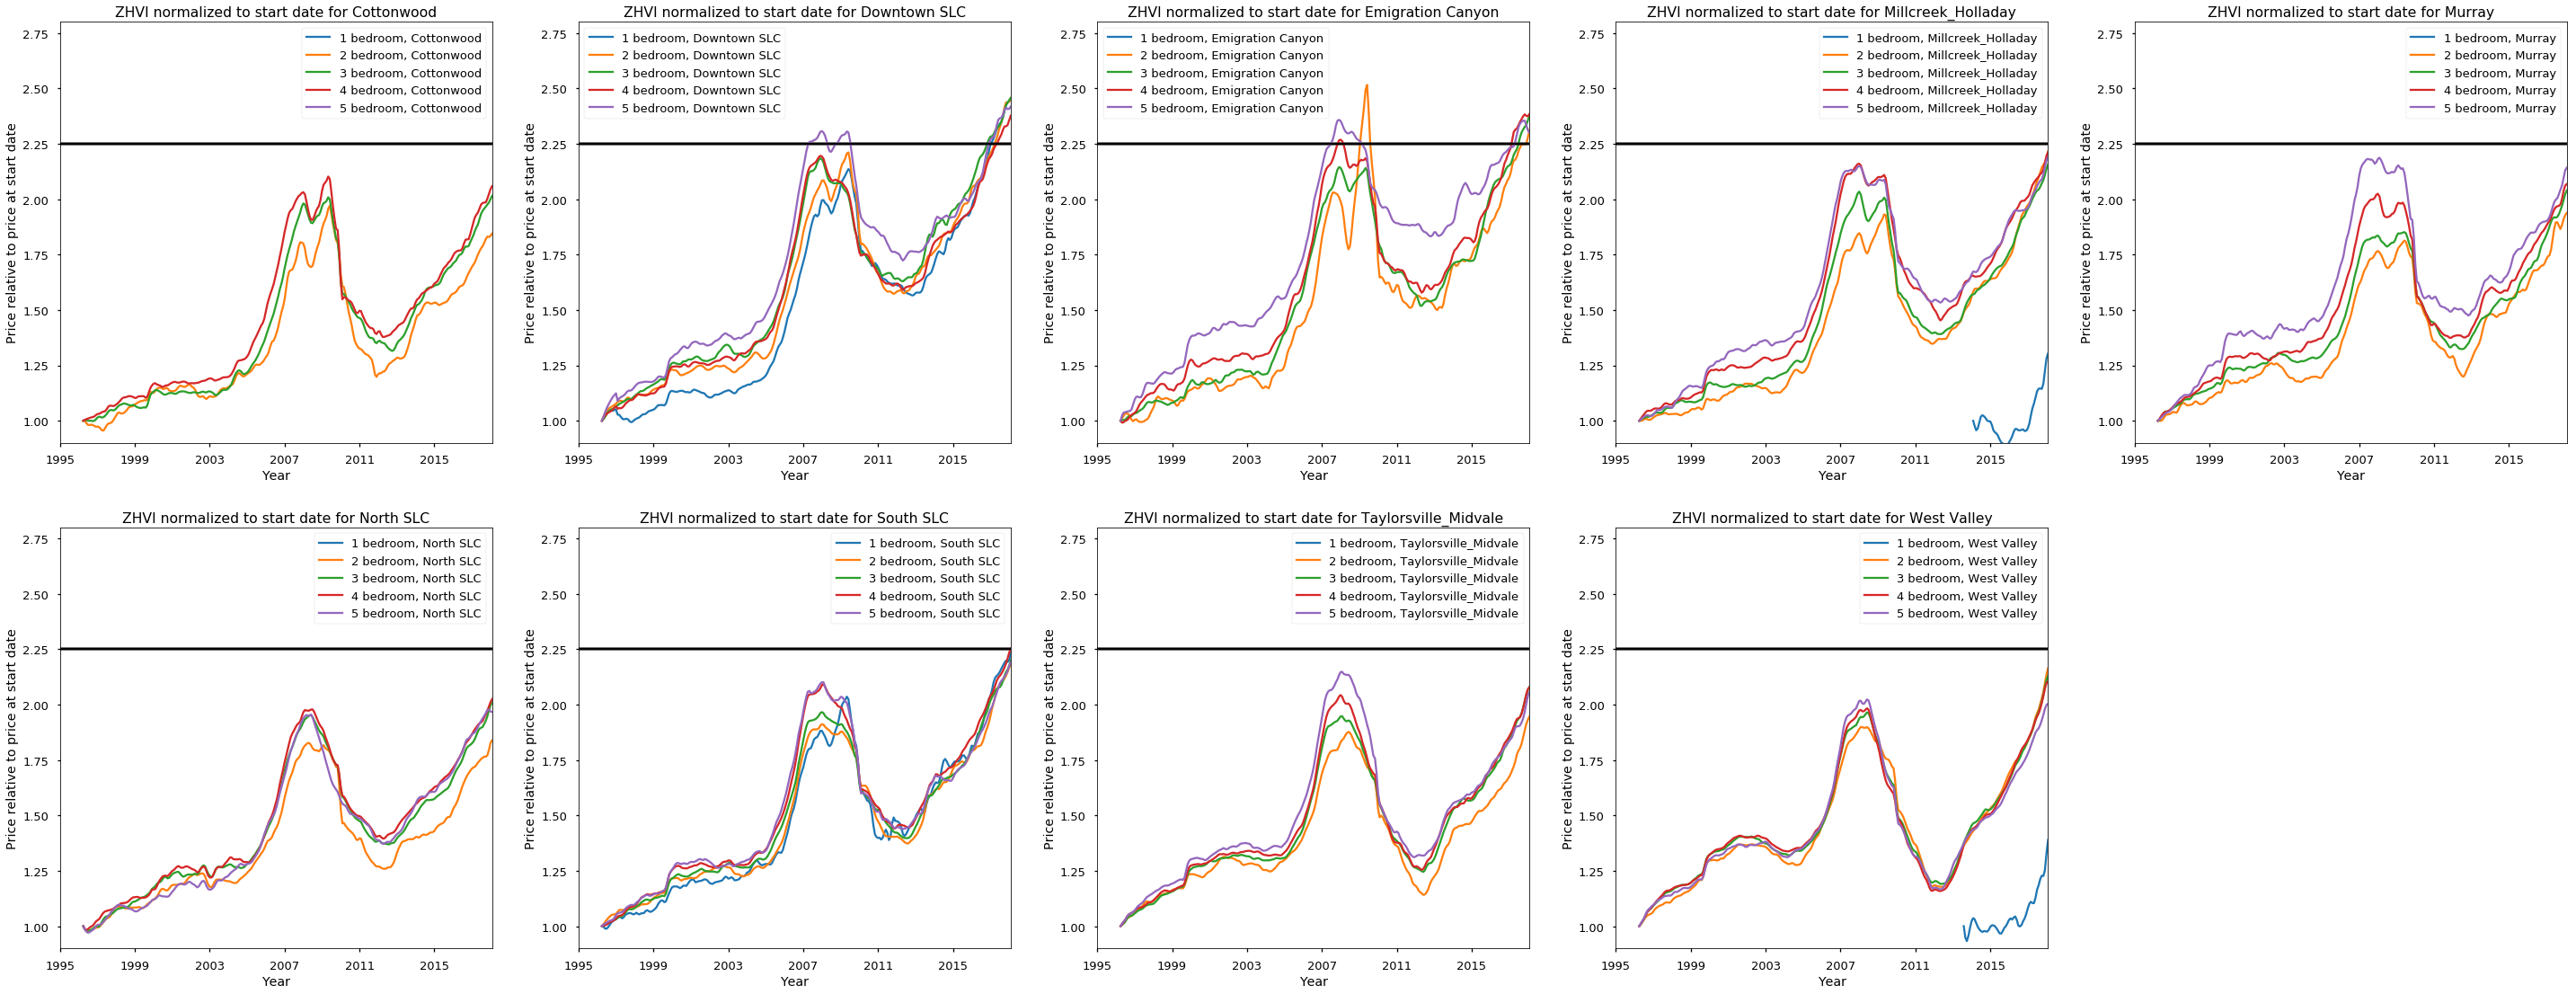

In [500]:
# for each neighborhood/bed of home normalize to price at starting time stamp and save to dictionary

# make dict of all combinations of neighborhood/bedrooms
neighborhood_list = list(listings_historical_neibs_collapsed['neighborhood'].unique())
bed_list = list(range(1,6))
neighborhood_bed_perms = {k:v for k,v in zip(neighborhood_list, [bed_list]*len(neighborhood_list))}

#make the axes fonts bigger
sns.set_context("talk")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for nb,bds in neighborhood_bed_perms.items():
    neib = nb
    neib_all_beds = listings_historical_neibs_collapsed[(listings_historical_neibs_collapsed['neighborhood'] == 
                                                             nb)].dropna(axis=0, how='any')
    fig.add_subplot(5, 5, sub_plot_num)
    for num in bds:
        beds = num
        neib_num_beds = neib_all_beds[neib_all_beds['beds']==num]
        plt.plot(neib_num_beds['year_month'], neib_num_beds['price_normalized'], label='{} bedroom, {}'.format(num, nb))
        plt.title('ZHVI normalized to start date for {}'.format(nb))
        plt.ylabel('Price relative to price at start date')
        plt.xlabel('Year')
        plt.ylim((.9, 2.8)) 
        plt.xlim(datetime.date(1995, 1, 1), datetime.date(2018, 2, 1))
        plt.axhline(y=2.25, color='black', linestyle='-')
        plt.legend()
    sub_plot_num +=1

In [501]:
listings_historical_slc_long_adjusted.sort_values('price_normalized', ascending=False).head(n=10)

,beds,neighborhood,postal_code,year_month,price,price_normalized,price_normalized_date
24643,2.0,Downtown SLC,84101,2018-02-01,336300.0,2.894148,1996-04-01
24549,2.0,Downtown SLC,84101,2018-01-01,333300.0,2.868330,1996-04-01
24410,5.0,Downtown SLC,84102,2017-11-01,489400.0,2.865340,1996-04-01
24361,2.0,Downtown SLC,84101,2017-11-01,332500.0,2.861446,1996-04-01
24455,2.0,Downtown SLC,84101,2017-12-01,331900.0,2.856282,1996-04-01
24267,2.0,Downtown SLC,84101,2017-10-01,331900.0,2.856282,1996-04-01
24316,5.0,Downtown SLC,84102,2017-10-01,486200.0,2.846604,1996-04-01
24504,5.0,Downtown SLC,84102,2017-12-01,484300.0,2.835480,1996-04-01
24173,2.0,Downtown SLC,84101,2017-09-01,328700.0,2.828744,1996-04-01
24692,5.0,Downtown SLC,84102,2018-02-01,481900.0,2.821429,1996-04-01


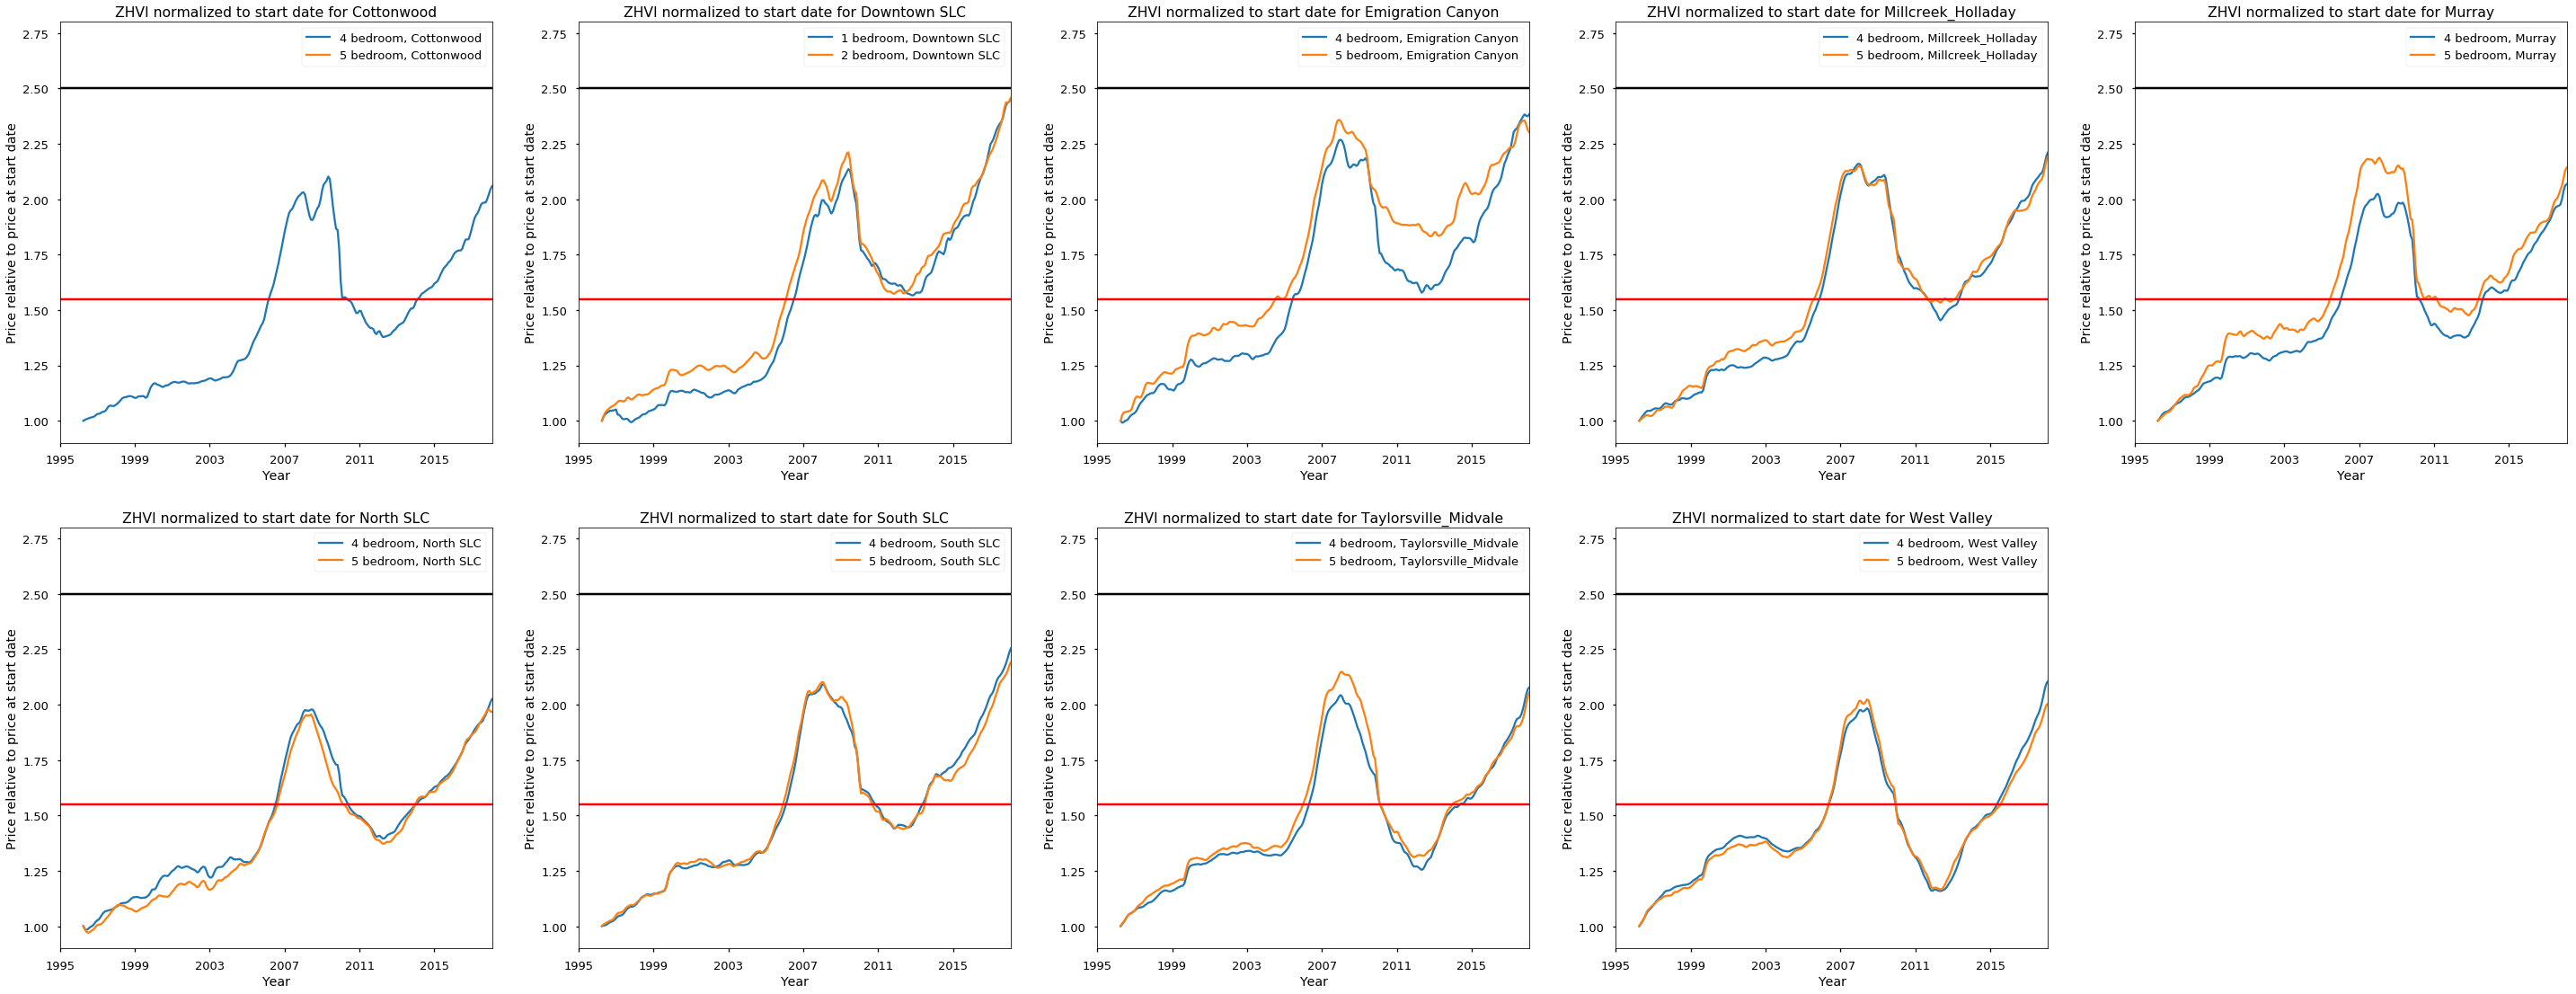

In [511]:
# filtered neighborhood-bed permulations to only compare suburban large homes to urban small homes

neighborhood_bed_perms_filtered = {'Cottonwood': [4, 5],
 'Downtown SLC': [1, 2],
 'Emigration Canyon': [4, 5],
 'Millcreek_Holladay': [4, 5],
 'Murray': [4, 5],
 'North SLC': [4, 5],
 'South SLC': [4, 5],
 'Taylorsville_Midvale': [4, 5],
 'West Valley': [4, 5]}


#replotted with only small urban homes and large suburban homes
sns.set_context("talk")
fig = plt.figure(figsize=[50, 50])

sub_plot_num = 1

for nb,bds in neighborhood_bed_perms_filtered.items():
    neib = nb
    neib_all_beds = listings_historical_neibs_collapsed[(listings_historical_neibs_collapsed['neighborhood'] == 
                                                             nb)].dropna(axis=0, how='any')
    fig.add_subplot(5, 5, sub_plot_num)
    for num in bds:
        beds = num
        neib_num_beds = neib_all_beds[neib_all_beds['beds']==num]
        plt.plot(neib_num_beds['year_month'], neib_num_beds['price_normalized'], label='{} bedroom, {}'.format(num, nb))
        plt.title('ZHVI normalized to start date for {}'.format(nb))
        plt.ylabel('Price relative to price at start date')
        plt.xlabel('Year')
        plt.ylim((.9, 2.8)) 
        plt.xlim(datetime.date(1995, 1, 1), datetime.date(2018, 2, 1))
        plt.axhline(y=2.5, color='black', linestyle='-')
        plt.axhline(y=1.55, color='r', linestyle='-')

        plt.legend()
    sub_plot_num +=1

In [427]:
listings_historical_slc_long_adjusted.sort_values('price_normalized').head(n=30)

,beds,neighborhood,postal_code,year_month,price,price_normalized,price_normalized_date
22090,1.0,Millcreek_Holladay,84117,2015-11-01,88900.0,0.888112,2014-02-01
22184,1.0,Millcreek_Holladay,84117,2015-12-01,89200.0,0.891109,2014-02-01
21996,1.0,Millcreek_Holladay,84117,2015-10-01,89500.0,0.894106,2014-02-01
21902,1.0,Millcreek_Holladay,84117,2015-09-01,89800.0,0.897103,2014-02-01
22278,1.0,Millcreek_Holladay,84117,2016-01-01,90300.0,0.902098,2014-02-01
21808,1.0,Millcreek_Holladay,84117,2015-08-01,90400.0,0.903097,2014-02-01
22372,1.0,Millcreek_Holladay,84117,2016-02-01,91600.0,0.915085,2014-02-01
21714,1.0,Millcreek_Holladay,84117,2015-07-01,91700.0,0.916084,2014-02-01
22466,1.0,Millcreek_Holladay,84117,2016-03-01,93000.0,0.929071,2014-02-01
21620,1.0,Millcreek_Holladay,84117,2015-06-01,93300.0,0.932068,2014-02-01


### Plotting un-normalized data by region

In [71]:
one_bed_downtown = listings_historical_slc_long[(listings_historical_slc_long['neighborhood'] == 'Downtown SLC')
                               &(listings_historical_slc_long['beds'] == 1)].dropna(axis=0, how='any')
two_bed_downtown = listings_historical_slc_long[(listings_historical_slc_long['neighborhood'] == 'Downtown SLC')
                               &(listings_historical_slc_long['beds'] == 2)].dropna(axis=0, how='any')
three_bed_downtown = listings_historical_slc_long[(listings_historical_slc_long['neighborhood'] == 'Downtown SLC')
                               &(listings_historical_slc_long['beds'] == 3)].dropna(axis=0, how='any')
four_bed_downtown = listings_historical_slc_long[(listings_historical_slc_long['neighborhood'] == 'Downtown SLC')
                               &(listings_historical_slc_long['beds'] == 4)].dropna(axis=0, how='any')
five_bed_downtown = listings_historical_slc_long[(listings_historical_slc_long['neighborhood'] == 'Downtown SLC')
                               &(listings_historical_slc_long['beds'] == 5)].dropna(axis=0, how='any')

one_bed_downtown = one_bed_downtown.groupby('year_month')['price'].mean()

two_bed_downtown = two_bed_downtown.groupby('year_month')['price'].mean()

three_bed_downtown = three_bed_downtown.groupby('year_month')['price'].mean()

four_bed_downtown = four_bed_downtown.groupby('year_month')['price'].mean()

five_bed_downtown = five_bed_downtown.groupby('year_month')['price'].mean()


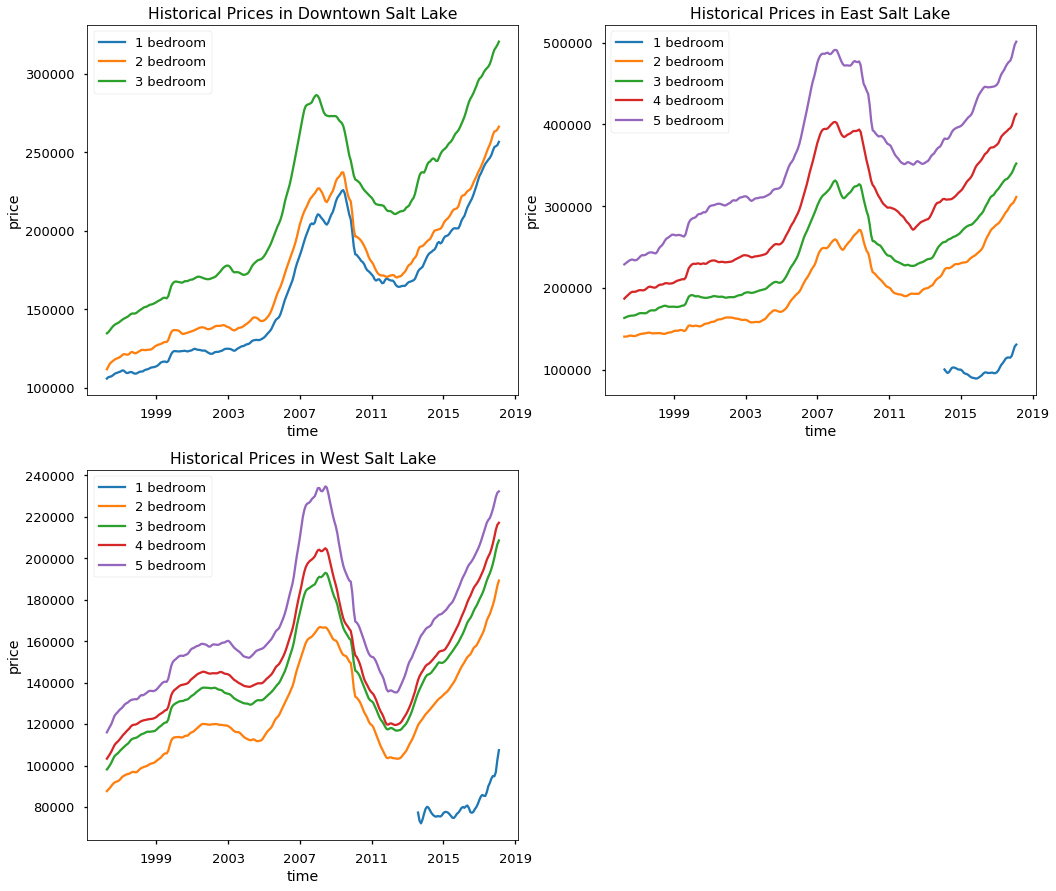

In [72]:
#plot downtown SLC data - DATA NOT NORMALIZED

#make the axes fonts bigger
sns.set_context("talk")
fig = plt.figure(figsize=[17, 15])

# first plot
fig.add_subplot(221)   #top left
plt.plot(one_bed_downtown.index,one_bed_downtown.values, label='1 bedroom')
plt.plot(two_bed_downtown.index,two_bed_downtown.values, label='2 bedroom')
plt.plot(three_bed_downtown.index,three_bed_downtown.values, label='3 bedroom')
#plt.plot(x_84101_4br,y_84101_4br, label='4 bedroom')
#plt.plot(x_84101_5br,y_84101_5br, label='5 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices in Downtown Salt Lake')

# second plot
fig.add_subplot(222)   #top left
plt.plot(one_bed_millcreek_holladay.index,one_bed_millcreek_holladay.values, label='1 bedroom')
plt.plot(two_bed_millcreek_holladay.index,two_bed_millcreek_holladay.values, label='2 bedroom')
plt.plot(three_bed_millcreek_holladay.index,three_bed_millcreek_holladay.values, label='3 bedroom')
plt.plot(four_bed_millcreek_holladay.index,four_bed_millcreek_holladay.values, label='4 bedroom')
plt.plot(five_bed_millcreek_holladay.index,five_bed_millcreek_holladay.values, label='5 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices in East Salt Lake')

# third plot
fig.add_subplot(223)   #top left
plt.plot(one_bed_west_valley.index,one_bed_west_valley.values, label='1 bedroom')
plt.plot(two_bed_west_valley.index,two_bed_west_valley.values, label='2 bedroom')
plt.plot(three_bed_west_valley.index,three_bed_west_valley.values, label='3 bedroom')
plt.plot(four_bed_west_valley.index,four_bed_west_valley.values, label='4 bedroom')
plt.plot(five_bed_west_valley.index,five_bed_west_valley.values, label='5 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices in West Salt Lake')

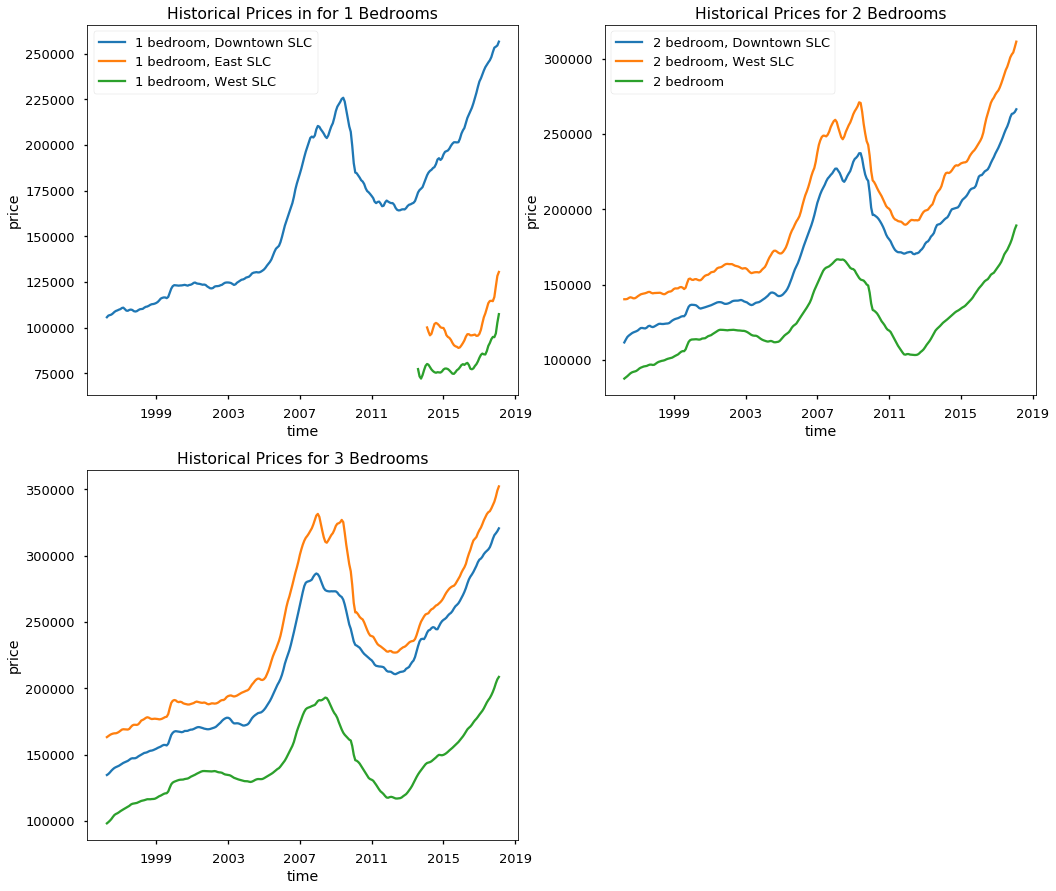

In [73]:
#plot downtown SLC data - DATA NOT NORMALIZED

#make the axes fonts bigger
sns.set_context("talk")
fig = plt.figure(figsize=[17, 15])

# first plot
fig.add_subplot(221)   #top left
plt.plot(one_bed_downtown.index,one_bed_downtown.values, label='1 bedroom, Downtown SLC')
plt.plot(one_bed_millcreek_holladay.index,one_bed_millcreek_holladay.values, label='1 bedroom, East SLC')
plt.plot(one_bed_west_valley.index,one_bed_west_valley.values, label='1 bedroom, West SLC')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices in for 1 Bedrooms')

# second plot
fig.add_subplot(222)   #top left
plt.plot(two_bed_downtown.index,two_bed_downtown.values, label='2 bedroom, Downtown SLC')
plt.plot(two_bed_millcreek_holladay.index,two_bed_millcreek_holladay.values, label='2 bedroom, West SLC')
plt.plot(two_bed_west_valley.index,two_bed_west_valley.values, label='2 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices for 2 Bedrooms')

# third plot
fig.add_subplot(223)   #top left
plt.plot(three_bed_downtown.index,three_bed_downtown.values, label='3 bedroom, Downtown SLC')
plt.plot(three_bed_millcreek_holladay.index,three_bed_millcreek_holladay.values, label='3 bedroom, East SLC')
plt.plot(three_bed_west_valley.index,three_bed_west_valley.values, label='3 bedroom')

plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices for 3 Bedrooms')

### Plotting un-normalized data by zip code

In [74]:
#creating variables for plotting
x_84101_1br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 1)]['year_month']
y_84101_1br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 1)]['price']

x_84101_2br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 2)]['year_month']
y_84101_2br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 2)]['price']

x_84101_3br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 3)]['year_month']
y_84101_3br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 3)]['price']

x_84101_4br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 4)]['year_month']
y_84101_4br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 4)]['price']
                               
x_84101_5br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 5)]['year_month']
y_84101_5br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84101)
                               &(listings_historical_slc_long['beds'] == 5)]['price']

In [75]:
#creating variables for plotting 84105

x_84105_1br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 1)]['year_month']
y_84105_1br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 1)]['price']

x_84105_2br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 2)]['year_month']
y_84105_2br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 2)]['price']

x_84105_3br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 3)]['year_month']
y_84105_3br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 3)]['price']

x_84105_4br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 4)]['year_month']
y_84105_4br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 4)]['price']
                               
x_84105_5br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 5)]['year_month']
y_84105_5br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84105)
                               &(listings_historical_slc_long['beds'] == 5)]['price']

In [76]:
#creating variables for plotting 84106

x_84106_1br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 1)]['year_month']
y_84106_1br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 1)]['price']

x_84106_2br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 2)]['year_month']
y_84106_2br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 2)]['price']

x_84106_3br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 3)]['year_month']
y_84106_3br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 3)]['price']

x_84106_4br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 4)]['year_month']
y_84106_4br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 4)]['price']
                               
x_84106_5br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)
                               &(listings_historical_slc_long['beds'] == 5)]['year_month']
y_84106_5br=listings_historical_slc_long[(listings_historical_slc_long['postal_code'] == 84106)

                                         &(listings_historical_slc_long['beds'] == 5)]['price']

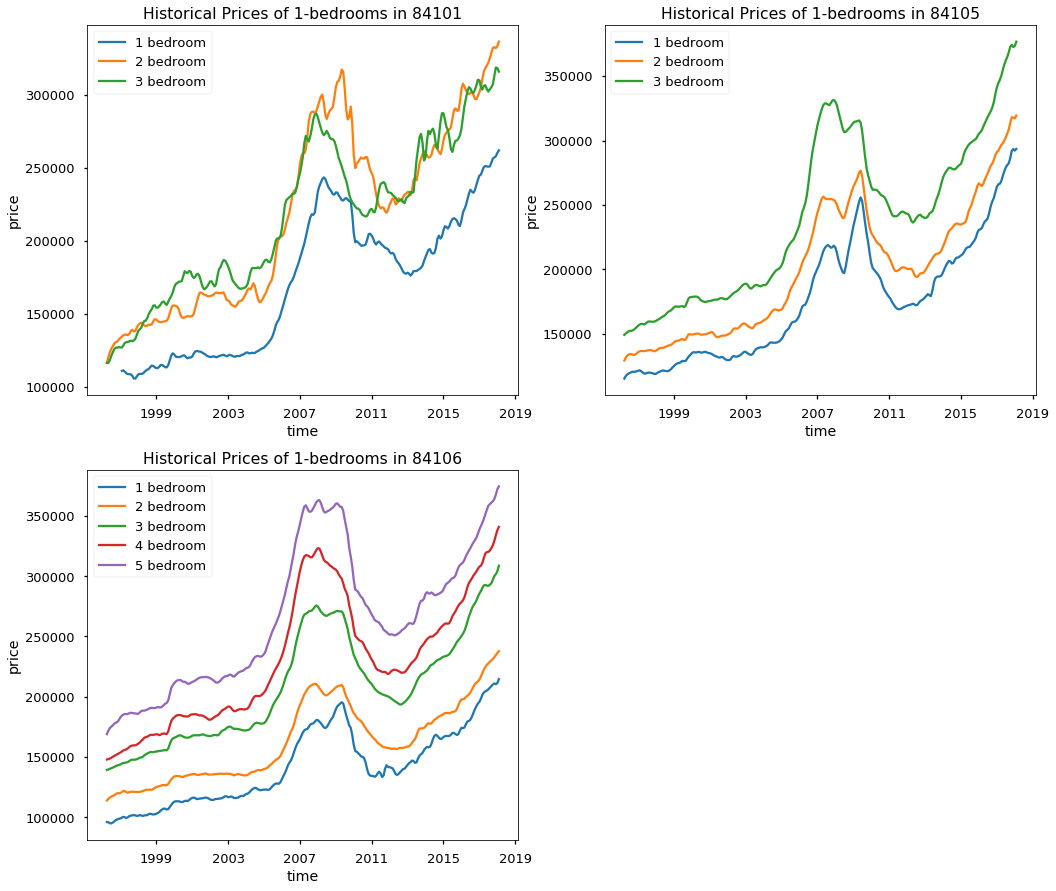

In [77]:
#plot downtown SLC data - DATA NOT NORMALIZED

#make the axes fonts bigger
sns.set_context("talk")
fig = plt.figure(figsize=[17, 15])

# first plot
fig.add_subplot(221)   #top left
plt.plot(x_84101_1br,y_84101_1br, label='1 bedroom')
plt.plot(x_84101_2br,y_84101_2br, label='2 bedroom')
plt.plot(x_84101_3br,y_84101_3br, label='3 bedroom')
#plt.plot(x_84101_4br,y_84101_4br, label='4 bedroom')
#plt.plot(x_84101_5br,y_84101_5br, label='5 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices of 1-bedrooms in 84101')

# second plot
fig.add_subplot(222)   #top right
plt.plot(x_84105_1br,y_84105_1br, label='1 bedroom')
plt.plot(x_84105_2br,y_84105_2br, label='2 bedroom')
plt.plot(x_84105_3br,y_84105_3br, label='3 bedroom')
#plt.plot(x_84105_4br,y_84105_4br, label='4 bedroom')
#plt.plot(x_84105_5br,y_84105_5br, label='5 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices of 1-bedrooms in 84105')


# third plot
fig.add_subplot(223)   #bottom right
plt.plot(x_84106_1br,y_84106_1br, label='1 bedroom')
plt.plot(x_84106_2br,y_84106_2br, label='2 bedroom')
plt.plot(x_84106_3br,y_84106_3br, label='3 bedroom')
plt.plot(x_84106_4br,y_84106_4br, label='4 bedroom')
plt.plot(x_84106_5br,y_84106_5br, label='5 bedroom')
plt.legend()
plt.ylabel('price')
plt.xlabel('time')
plt.title('Historical Prices of 1-bedrooms in 84106')

plt.show()